In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=09e4cd19dadd0d36fe060a1ead520e9f3276c233587f2fe1725267bdf82eaedd
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, round, expr
import matplotlib.pyplot as plt
spark = SparkSession.builder.master("local[*]").getOrCreate()

print(spark.sparkContext)
print("Spark App Name: " + spark.sparkContext.appName)


<SparkContext master=local[*] appName=pyspark-shell>
Spark App Name: pyspark-shell


In [3]:
df = spark.read.csv("BostonHousing.csv", header=True, inferSchema=True)


In [4]:
df.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [5]:
num_observations = df.count()
print(f"Number of observations: {num_observations}")

Number of observations: 506


In [6]:
df.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [7]:
df = df.drop("b")

In [8]:
numerical_columns = [col_name for col_name, dtype in df.dtypes if dtype == 'double' or dtype == 'int']
for col_name in numerical_columns:
    df = df.withColumn(col_name, round(col(col_name), 2))

In [9]:
df = df.withColumn("Age10", (col("age") * 1.1))

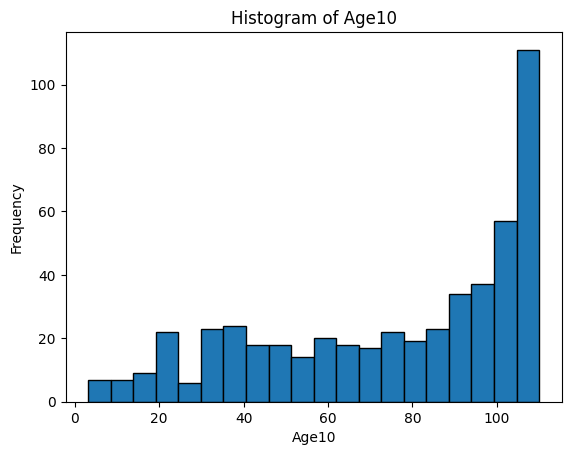

In [10]:
age10_data = df.select("Age10").rdd.flatMap(lambda x: x).collect()
plt.hist(age10_data, bins=20, edgecolor='black')
plt.title("Histogram of Age10")
plt.xlabel("Age10")
plt.ylabel("Frequency")
plt.show()

In [11]:
df.describe().show()


+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|               nox|                rm|               age|               dis|              rad|               tax|           ptratio|             lstat|              medv|             Age10|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|               506|               506|               506|               506|              

In [12]:
pdf = df.toPandas()

In [13]:
print(pdf.tail())

     crim   zn  indus  chas   nox    rm   age   dis  rad  tax  ptratio  lstat  \
501  0.06  0.0  11.93     0  0.57  6.59  69.1  2.48    1  273     21.0   9.67   
502  0.05  0.0  11.93     0  0.57  6.12  76.7  2.29    1  273     21.0   9.08   
503  0.06  0.0  11.93     0  0.57  6.98  91.0  2.17    1  273     21.0   5.64   
504  0.11  0.0  11.93     0  0.57  6.79  89.3  2.39    1  273     21.0   6.48   
505  0.05  0.0  11.93     0  0.57  6.03  80.8  2.51    1  273     21.0   7.88   

     medv   Age10  
501  22.4   76.01  
502  20.6   84.37  
503  23.9  100.10  
504  22.0   98.23  
505  11.9   88.88  
